IMPORTACION DE LIBRERIAS

In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold
from joblib import dump
from sklearn import tree
import pydot
from IPython.display import Image

PREPROCESAMIENTO

Importación de los datos del dataset Y Mostrar las primeras y últimas filas del dataframe importado

In [ ]:
houses = pd.read_csv('/content/housing.csv')
houses

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


Mostrar parámetros estadísticos de los datos

In [ ]:
houses.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Mostrar un mapa de calor que indique la correlación entre variables

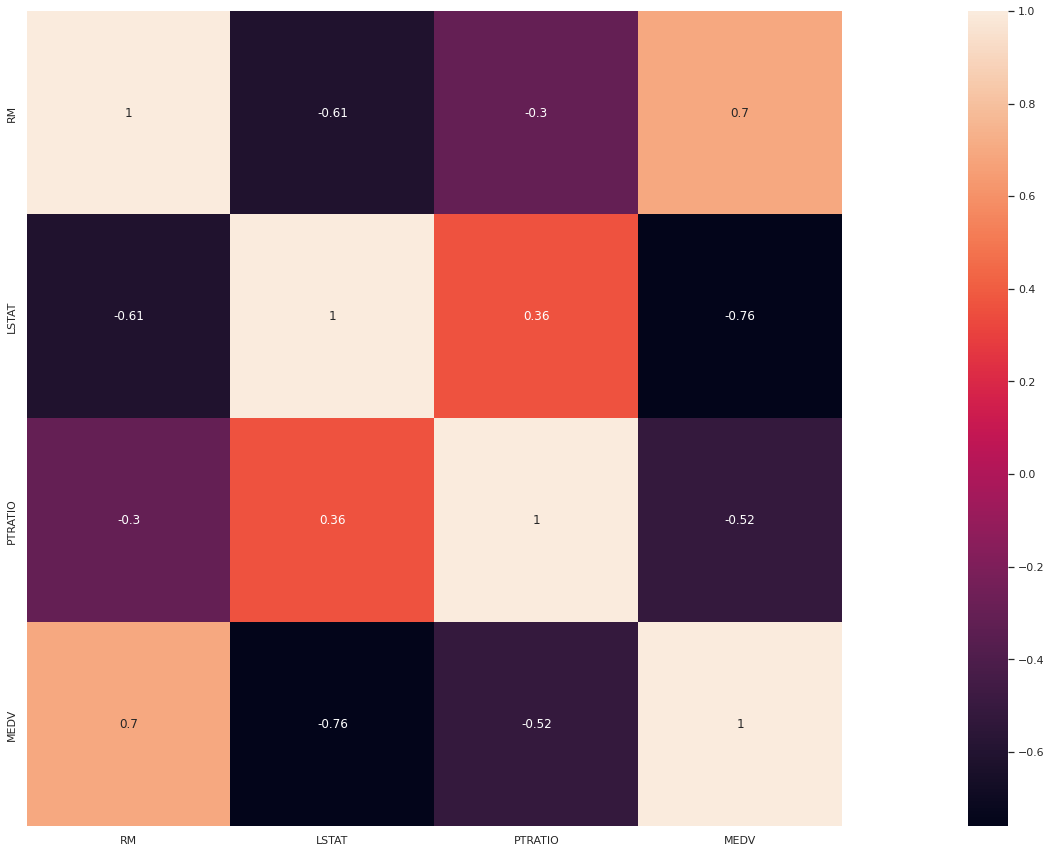

In [ ]:
sbn.set(rc = {'figure.figsize':(45,15)})
sbn.heatmap(houses.corr(), square=True, annot=True)

Seleccionar las características a tener en cuenta en el estudio.
Cuento con todas


Separar datos entre datos de entrada y etiquetas

In [ ]:
x_heart = houses.drop('MEDV', axis = 1)
y_heart = houses['MEDV']
y_heart

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_heart,y_heart, random_state=1, test_size=0.20)

ENTRENAMIENTO Y PREDICCION

Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y entrenar el modelO

In [ ]:
model = DecisionTreeRegressor(criterion='absolute_error', max_depth=3 )
model.fit(x_train, y_train)

Realizar una predicción con los datos de prueba

In [ ]:
y_model = model.predict(x_test)

Mostrar el árbol de decisión resultante

In [ ]:
houses_str = houses['MEDV'].astype(str)
result = []
for item in houses_str:
    if item not in result:
        result.append(item)
result

['504000.0',
 '453600.0',
 '728700.0',
 '701400.0',
 '760200.0',
 '602700.0',
 '480900.0',
 '569100.0',
 '346500.0',
 '396900.0',
 '315000.0',
 '455700.0',
 '428400.0',
 '382200.0',
 '417900.0',
 '485100.0',
 '367500.0',
 '424200.0',
 '285600.0',
 '411600.0',
 '319200.0',
 '304500.0',
 '327600.0',
 '291900.0',
 '348600.0',
 '310800.0',
 '386400.0',
 '441000.0',
 '266700.0',
 '277200.0',
 '275100.0',
 '283500.0',
 '420000.0',
 '518700.0',
 '646800.0',
 '732900.0',
 '558600.0',
 '531300.0',
 '445200.0',
 '405300.0',
 '302400.0',
 '407400.0',
 '413700.0',
 '430500.0',
 '525000.0',
 '491400.0',
 '743400.0',
 '663600.0',
 '489300.0',
 '392700.0',
 '336000.0',
 '466200.0',
 '693000.0',
 '493500.0',
 '462000.0',
 '365400.0',
 '438900.0',
 '508200.0',
 '478800.0',
 '506100.0',
 '449400.0',
 '436800.0',
 '426300.0',
 '588000.0',
 '501900.0',
 '520800.0',
 '472500.0',
 '495600.0',
 '474600.0',
 '432600.0',
 '596400.0',
 '812700.0',
 '919800.0',
 '697200.0',
 '577500.0',
 '556500.0',
 '390600.0',

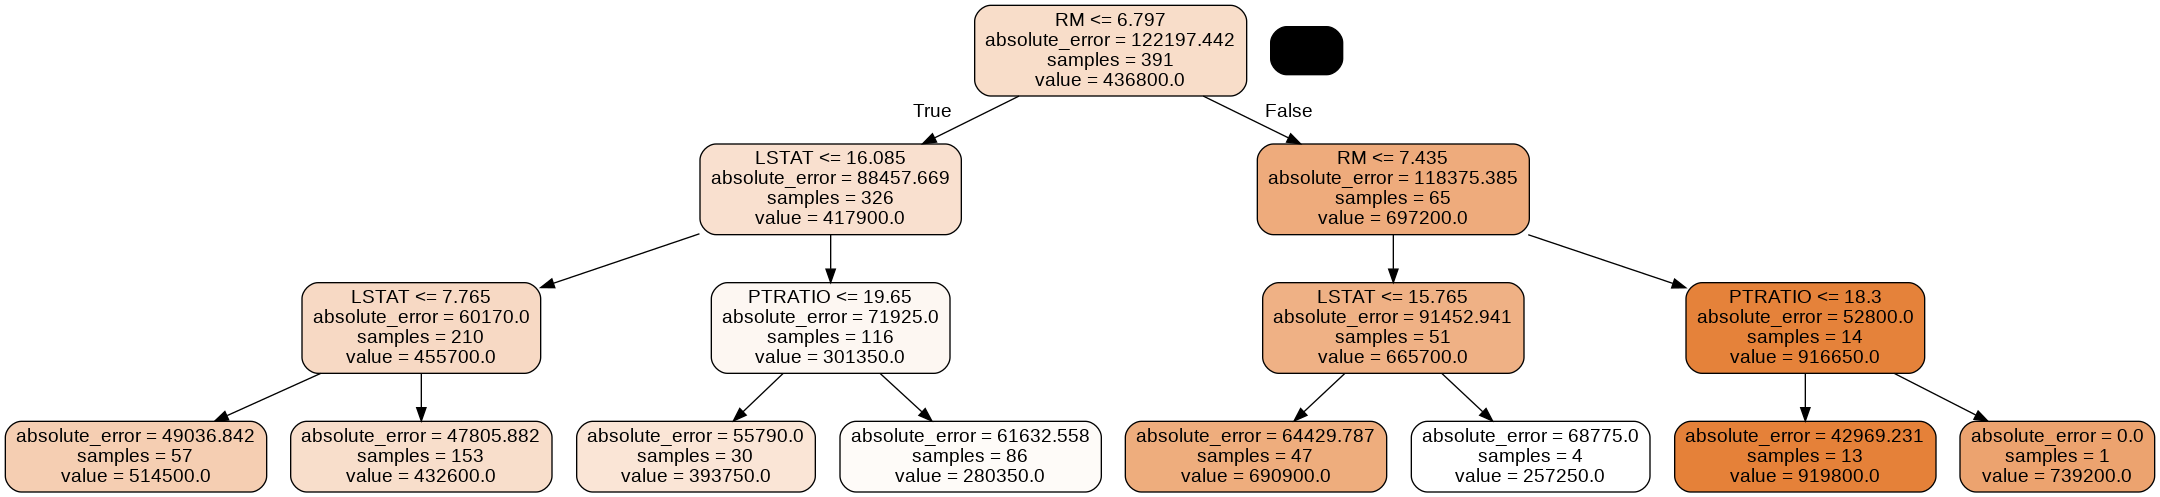

In [ ]:
dot_data = StringIO()
tree.export_graphviz(model, out_file= dot_data, rounded=True, class_names=result ,feature_names= x_train.columns, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Mostrar la importancia de cada atributo en el árbol resultante

In [ ]:
model.feature_importances_

array([0.50453905, 0.43770543, 0.05775552])

Almacenar el modelo de prediccion

In [ ]:
dump(model, 'casasBoston.joblib')

['casasBoston.joblib']

EVALUACION


Mostrar el error cuadratico medio

In [ ]:
mean_squared_error(y_model,y_test)

8055990000.0

Mostrar el error absoluto medio

In [ ]:
mean_absolute_error(y_model,y_test)

64564.28571428572

Representa graficamente los valores predichos

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


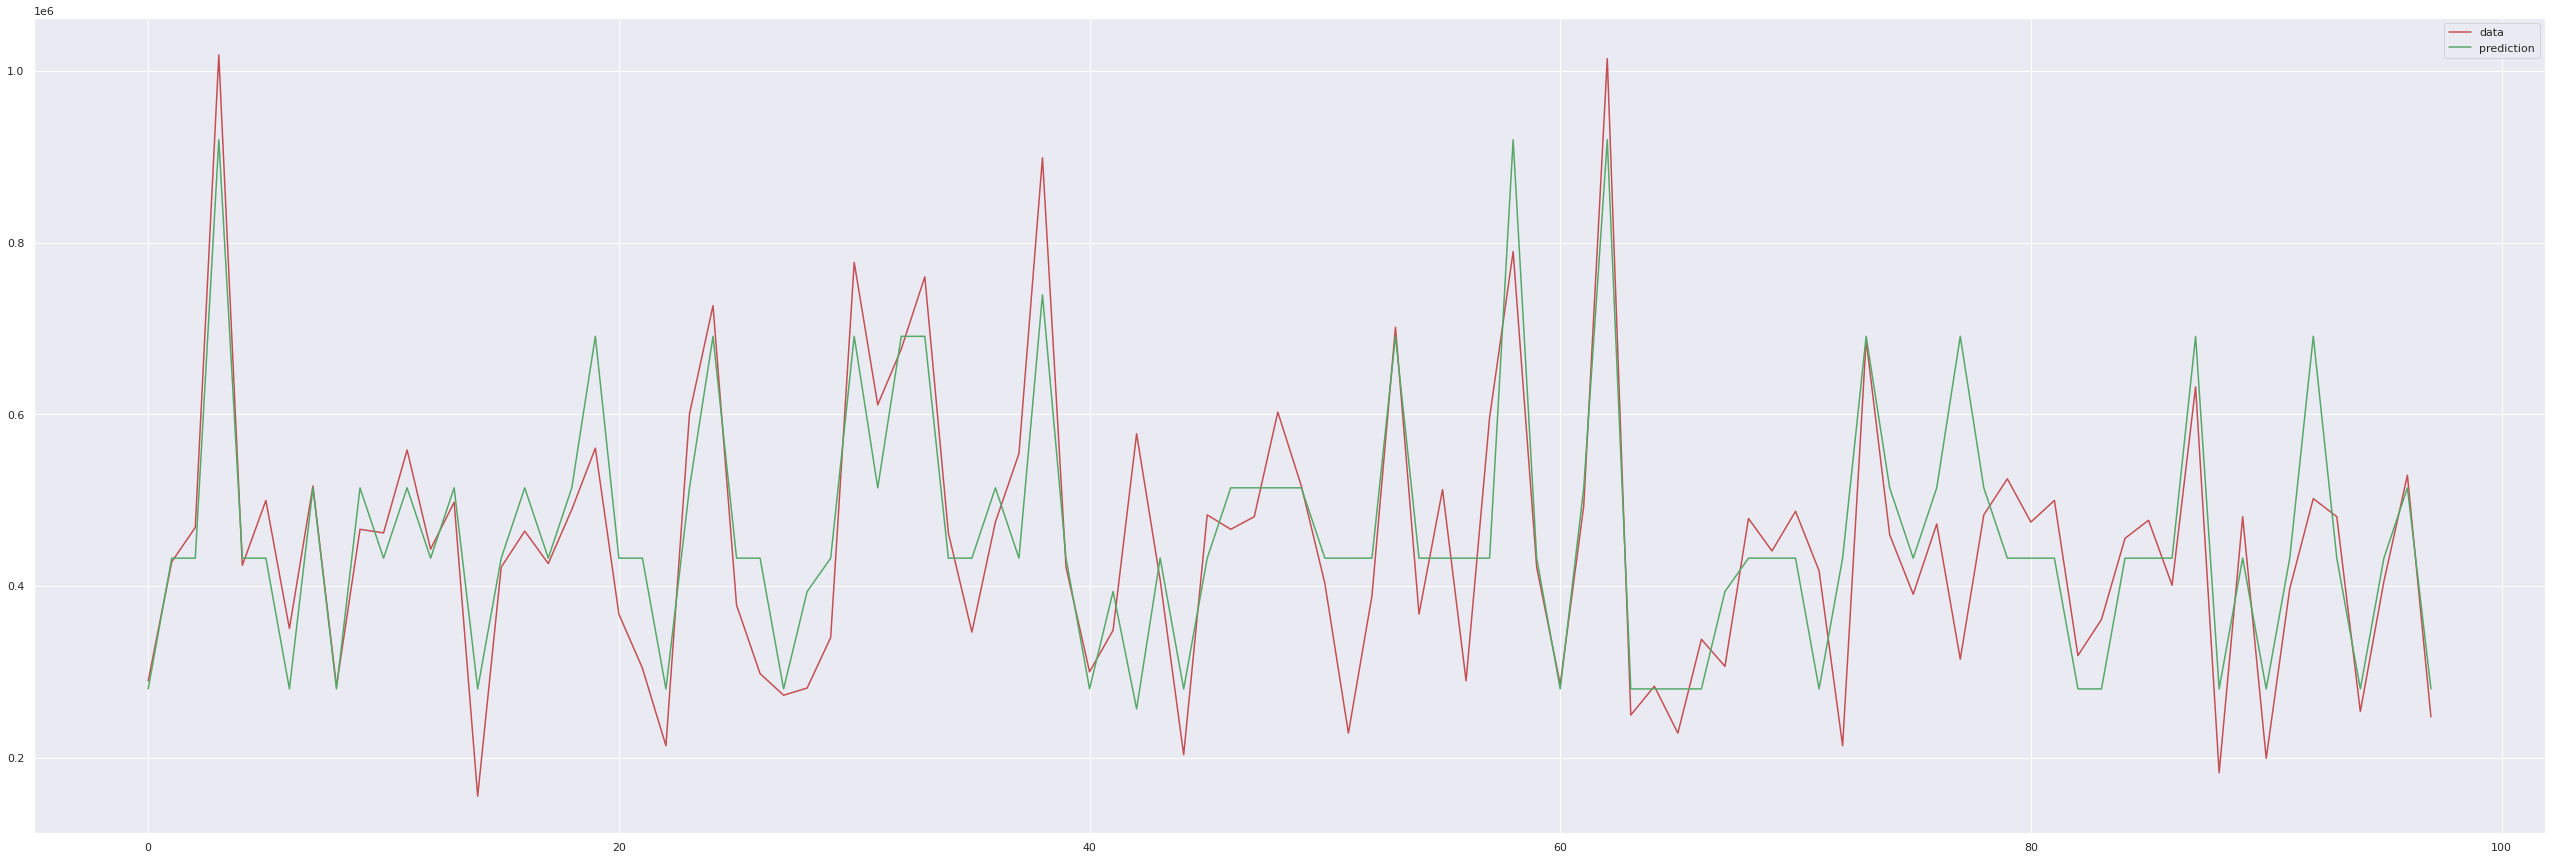

In [ ]:
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx,y_test, c='r', label='data')
plt.plot(xx,y_model, c='g',label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

OPTIMIZACION

In [ ]:
def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
 
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]

    model.fit(x_train_fold, y_train_fold)
    
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo con error absoluto medio
    acc = mean_absolute_error(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [ ]:
def validacion_cruzada_prep(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
 
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]

    model.fit(x_train_fold, y_train_fold)
    
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo con error absoluto medio
    acc = mean_absolute_error(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score, y_pred, y_test_fold

In [ ]:
kf = KFold(n_splits = 5)

for k in range(1,16):
  model_opti = DecisionTreeRegressor(criterion='absolute_error', max_depth=k)
  media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
  print("Para k: {k} con error absoluto la media es: {m}".format(k=k,m=media_cruzada))

Para k: 1 con error absoluto la media es: 99736.2317429406
Para k: 2 con error absoluto la media es: 73641.90847127556
Para k: 3 con error absoluto la media es: 59854.80525803311
Para k: 4 con error absoluto la media es: 56285.3164556962
Para k: 5 con error absoluto la media es: 57712.20545277507
Para k: 6 con error absoluto la media es: 59715.04381694255
Para k: 7 con error absoluto la media es: 60097.453748782864
Para k: 8 con error absoluto la media es: 62908.08666017527
Para k: 9 con error absoluto la media es: 64751.46543330088
Para k: 10 con error absoluto la media es: 65628.2035053554
Para k: 11 con error absoluto la media es: 66670.97857838364
Para k: 12 con error absoluto la media es: 67795.98831548198
Para k: 13 con error absoluto la media es: 68429.15774099319
Para k: 14 con error absoluto la media es: 67426.83544303797
Para k: 15 con error absoluto la media es: 68440.88120740019


In [ ]:
kf = KFold(n_splits = 5)

for k in range(1,31):
  model_opti = DecisionTreeRegressor(criterion='absolute_error', max_depth=k)
  media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
  if media_cruzada < 57000:
    print("Para k: {k} con error absoluto la media es: {m}".format(k=k,m=media_cruzada))
    model_graf = model_opti
    

Para k: 4 con error absoluto la media es: 56236.85491723466


In [ ]:
y_media_core_graf, y_pred_graf, y_test_graf = validacion_cruzada_prep(model_graf,x_train,y_train,kf)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


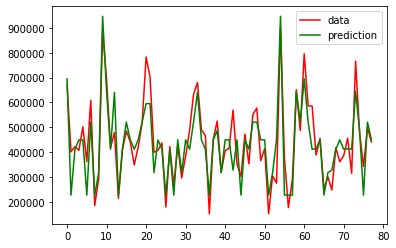

In [ ]:
xx = np.stack(i for i in range(y_test_graf.shape[0]))
plt.plot(xx,y_test_graf, c='r', label='data')
plt.plot(xx,y_pred_graf, c='g',label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()